In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
from IPython.display import display, Math, Markdown
%matplotlib inline

# Question 1 - Perspective and orthographic projections

In [2]:
def draw_poly(points,xlim,ylim,title,color):
  '''
  This function draws a polygon on a 2D axes. 
  Parameter 'points' is an array of (x,y) coordinates.
  The first point in 'points' is concatenated again to the end of the array, to
  create a closed polygon form. 
  '''
  _, ax = plt.subplots(figsize=(3, 3))
  points_axis = list(zip(*points+[points[0]]))
  ax.set_ylabel('Y axis')
  ax.set_xlabel('X axis')
  ax.set_ylim(ylim[0],ylim[1])
  ax.set_xlim(xlim[0],xlim[1])
  ax.set_title(title)
  ax.plot(*points_axis, color=color)
  return ax


def write_points(points):
    display(Markdown("The image points $P_i$ are:"))
    display(Math(r",".join([r"({:.2f},{:.2f})".format(*p)
                            for p in points])))

1.0

## Section A

(-0.1, -0.6)
(0.3, 0.6)
(-0.7, -0.2)
(0.5, -0.19999999999999998)
(-0.5, 0.6)


The image points $P_i$ are:

<IPython.core.display.Math object>

<AxesSubplot:title={'center':"Projection on Camera A's Image Plane"}, xlabel='X axis', ylabel='Y axis'>

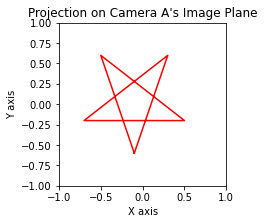

In [104]:
# =================  Write here the polygon's world points
p_w = [(0.4, 2.4,4.0), (-1.8,-3.6,6.0),(1.4,0.4,2.0),(-1.5,0.6,3.0),(2.5,-3.0,5.0)]
# =================

# Camera's focal length
f = 1
xc=0
yc=0
zc=0

x = 0
y = 0
z = 0

K = [
    [-f,0,0,0],
    [0,-f,0,0],
    [0,0,1,0],
]

Rz = [
    [np.cos(np.pi*(z)),-np.sin(np.pi*(z)),0],
    [np.sin(np.pi*(z)),np.cos(np.pi*(z)),0],
    [0,0,1.0]
]

Ry = [
    [np.cos(-np.pi*(y)),0,np.sin(np.pi*(y))],
    [0,1.0,0],
    [-np.sin(np.pi*(y)),0,np.cos(np.pi*(y))]
]

Rx = [
    [1.0,0,0],
    [0,np.cos(np.pi*(x)),-np.sin(np.pi*(x))],
    [0,np.sin(np.pi*(x)),np.cos(np.pi*(x))]
]


Rxyz = np.dot(np.dot(Rx,Ry), Rz)
t = [[-xc],[-yc],[-zc]]
last_row = np.array([[0,0,0,1]])
F = np.append(Rxyz,t,1)
F = np.append(F,last_row,axis=0)

M = np.dot(K,F)

p_i = [np.dot(M, np.array([x,y,z,1])) for x,y,z in p_w]

image_a_pts = [(x/z, y/z) for x,y,z in p_i]
for i in image_a_pts: print(i)   
# Camera's world position


# # =================  Change this to the solution of the question (i.e., find the projected points on the image plane)
# # image_a_pts = np.array(list([-f*(x-xc)/z, -f*(y-yc)/z] for x,y,z in p_w))
# image_a_pts = list([-f*(x-xc)/z, -f*(y-yc)/z] for x,y,z in p_w)
# # image_a_pts = np.zeros((5,2))
# # ================= 

write_points(image_a_pts)
draw_poly(image_a_pts,[-1,1],[-1,1],'Projection on Camera A\'s Image Plane','red')

## Section b



5.62   0.25
1.45   -0.24
1.94   0.39
2.35   -0.44
1.43   0.36


The image points $P_i$ are:

<IPython.core.display.Math object>

<AxesSubplot:title={'center':"Projection on Camera B's Image Plane"}, xlabel='X axis', ylabel='Y axis'>

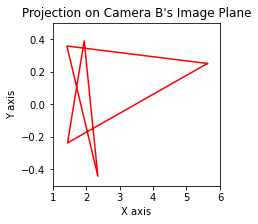

In [105]:


# Camera's focal length
f = 1

# Camera's focal length

xc = -5
yc = 0
zc = 4

x = 0.5
y = 0.5
z = 0
K = [
    [-f,0,0,0],
    [0,-f,0,0],
    [0,0,1,0],
]

Rz = [
    [np.cos(np.pi*(z)),-np.sin(np.pi*(z)),0],
    [np.sin(np.pi*(z)),np.cos(np.pi*(z)),0],
    [0,0,1.0]
]

Ry = [
    [np.cos(-np.pi*(y)),0,np.sin(np.pi*(y))],
    [0,1.0,0],
    [-np.sin(np.pi*(y)),0,np.cos(np.pi*(y))]
]

Rx = [
    [1.0,0,0],
    [0,np.cos(np.pi*(x)),-np.sin(np.pi*(x))],
    [0,np.sin(np.pi*(x)),np.cos(np.pi*(x))]
]

Rxyz = np.dot(np.dot(Rx,Ry), Rz)
t = [[-xc],[-yc],[-zc]]
last_row = np.array([[0,0,0,1]])
F = np.append(Rxyz,t,1)
F = np.append(F,last_row,axis=0)

M = np.dot(K,F)
# rotate = [np.dot(Rxyz, np.array([x1,y1,z1])) for x1,y1,z1 in p_w]
# for i in rotate: print(i)

# for i in p_w: print(i)
# print('\n')
p_i = [np.dot(M, np.array([x1,y1,z1,1])) for x1,y1,z1 in p_w]

image_b_pts = [(x/z, y/z) for x,y,z in p_i]
for i in image_b_pts: print(r'{:.2f}   {:.2f}'.format(*i))
# Camera's world position


# # =================  Change this to the solution of the question (i.e., find the projected points on the image plane)
# # image_a_pts = np.array(list([-f*(x-xc)/z, -f*(y-yc)/z] for x,y,z in p_w))
# image_a_pts = list([-f*(x-xc)/z, -f*(y-yc)/z] for x,y,z in p_w)
# # image_a_pts = np.zeros((5,2))
# # ================= 

write_points(image_b_pts)
draw_poly(image_b_pts,[1,6],[-0.5,0.5],'Projection on Camera B\'s Image Plane','red')

## Section c

The image points $P_i$ are:

<IPython.core.display.Math object>

<AxesSubplot:title={'center':"Orthographic projection on Camera B's Image Plane"}, xlabel='X axis', ylabel='Y axis'>

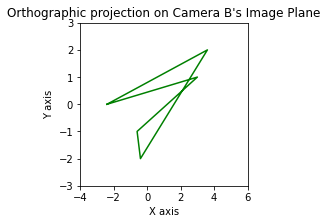

In [109]:
# =================  Change this to the solution of the question (i.e., find the projected points on the image plane)


xc = -5
yc = 0
zc = 4

x = 0
y = 0
z = 0
K = [
    [-f,0,0,0],
    [0,-f,0,0],
    [0,0,1,0],
]

Rz = [
    [np.cos(np.pi*(z)),-np.sin(np.pi*(z)),0],
    [np.sin(np.pi*(z)),np.cos(np.pi*(z)),0],
    [0,0,1.0]
]

Ry = [
    [np.cos(-np.pi*(y)),0,np.sin(np.pi*(y))],
    [0,1.0,0],
    [-np.sin(np.pi*(y)),0,np.cos(np.pi*(y))]
]

Rx = [
    [1.0,0,0],
    [0,np.cos(np.pi*(x)),-np.sin(np.pi*(x))],
    [0,np.sin(np.pi*(x)),np.cos(np.pi*(x))]
]

Rxyz = np.dot(np.dot(Rx,Ry), Rz)
t = [[-xc],[-yc],[-zc]]
last_row = np.array([[0,0,0,1]])
F = np.append(Rxyz,t,1)
F = np.append(F,last_row,axis=0)

M = np.dot(K,F)
# rotate = [np.dot(Rxyz, np.array([x1,y1,z1])) for x1,y1,z1 in p_w]
# for i in rotate: print(i)

# for i in p_w: print(i)

p_i = [np.dot(M, np.array([x1,y1,z1,1])) for x1,y1,z1 in p_w]
image_b_pts_orth = list([y,z] for x,y,z in p_i)
# ================= 


write_points(image_b_pts_orth)
draw_poly(image_b_pts_orth,[-4,6],[-3,3],'Orthographic projection on Camera B\'s Image Plane','green')

# Question 2 - Camera calibration

## Section A

In [ ]:
images = [cv2.imread(f'myChess/chess{i}.jpeg', cv2.IMREAD_GRAYSCALE) for i in range(20)] # Replace with code to read your images

pattern_size = (7, 7)
corners = [cv2.findChessboardCorners(img, pattern_size) for img in images]# Add code for detecting chessboard corners
print('got here')
image_corners = [plt.imshow(cv2.drawChessboardCorners(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), pattern_size, corner,found) , figure=plt.figure(figsize=(10,10))) for img, (found, corner) in zip(images, corners)] 
# Code for drawing chessboard corners

# _, axes = plt.subplots(10, 2,
#                        figsize=(15,75))

# for (i, image), ax in zip(enumerate(images), chain.from_iterable(axes)):
#     ax.imshow(image)
#     ax.set_title(f"Image {i}")

## Section B

In [ ]:
from itertools import product
xs, ys = pattern_size
world_points = np.array([(x, y, 0)
                         for y, x in product(range(ys), range(xs))],
                        dtype=np.float32)
print(world_points)


## Section C - Perform a calibration

In [ ]:
# perform calibration here
for (_,corner), chess_image in zip(corners, images):
    retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints=[world_points],
    imagePoints=[corner],
    imageSize=image.shape[::-1],
    cameraMatrix=None,
    distCoeffs=None)
    print(distCoeffs)
    print(np.array(rvecs).shape)
    print(np.array(tvecs).shape)
    print(tvecs)

    print(cameraMatrix)
# cameraMatrix: is the camera calibration
# rvecs: rotation vectors
# tvecs: translation vectors
# distCoeffs: distortion coefficients

## Section D  - Camera matrix

In [ ]:
extrinsic_transformations = [np.zeros(1,1) #<==== Replace with code to extract transfomration matrix
                             for tvec, rvec in zip(tvecs, rvecs)]
M_matrices = [x #<=== Change with your code
              for x in extrinsic_transformations]

## Section E

In [ ]:
## Display the chessboard image here

In [ ]:
#Projection using camera matrix

In [ ]:
#Projection using cv2.projectPoints

## Section F

In [ ]:
# Draw cube here

In [ ]:
# Draw rotated cube here